In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

In [2]:
df_o = pd.read_csv("./data/식물_전처리 - merged_df(4차)_2.csv")

In [3]:
df_o

,cntntsNo(컨텐츠 번호),cntntsSj(식물 명),clCodeNm(꽃 여부),열매여부,다육,덩굴,growthAraInfo (성장 넓이 정보),growthHgInfo (성장 높이 정보),lighttdemanddoCodeNm (광요구도 코드),managedemanddoCode (관리요구도 코드),watercycleSummerCode (물주기 여름 코드)
0,12938,가울테리아,1,1,0,0,1,1,2,58001,53003
1,12954,개운죽,0,0,0,0,2,2,1,58001,53002
2,12955,골드크레스트 '윌마',0,0,0,0,2,3,4,58002,53003
3,12957,공작야자,0,0,0,0,3,3,2,58003,53003
4,12962,관엽베고니아,1,0,0,0,2,1,2,58002,53003
...,...,...,...,...,...,...,...,...,...,...,...
212,12932,황금죽,0,0,0,0,2,3,2,58003,53003
213,12956,후피향나무,0,0,0,0,2,3,4,58001,53003
214,12920,흰꽃나도사프란,1,0,0,0,2,1,4,58001,53003
215,12919,흰줄무늬달개비(트라데스칸티아),0,0,0,1,2,1,2,58002,53003


In [4]:
df = df_o.drop(columns='cntntsSj(식물 명)')

In [5]:
new_column_names = ["cntntsNo", "clCodeNm", "fruit", "succulent", "vine",\
                    "growthAra", "growthHg", "lightdemand", "manage", "watercycle"]
df.columns = new_column_names
df.head()

,cntntsNo,clCodeNm,fruit,succulent,vine,growthAra,growthHg,lightdemand,manage,watercycle
0,12938,1,1,0,0,1,1,2,58001,53003
1,12954,0,0,0,0,2,2,1,58001,53002
2,12955,0,0,0,0,2,3,4,58002,53003
3,12957,0,0,0,0,3,3,2,58003,53003
4,12962,1,0,0,0,2,1,2,58002,53003


In [6]:
df = df.set_index('cntntsNo')
df

,clCodeNm,fruit,succulent,vine,growthAra,growthHg,lightdemand,manage,watercycle
cntntsNo,,,,,,,,,
12938,1,1,0,0,1,1,2,58001,53003
12954,0,0,0,0,2,2,1,58001,53002
12955,0,0,0,0,2,3,4,58002,53003
12957,0,0,0,0,3,3,2,58003,53003
12962,1,0,0,0,2,1,2,58002,53003
...,...,...,...,...,...,...,...,...,...
12932,0,0,0,0,2,3,2,58003,53003
12956,0,0,0,0,2,3,4,58001,53003
12920,1,0,0,0,2,1,4,58001,53003


In [7]:
inertia_list = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    inertia_list.append(km.inertia_)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<AxesSubplot: >

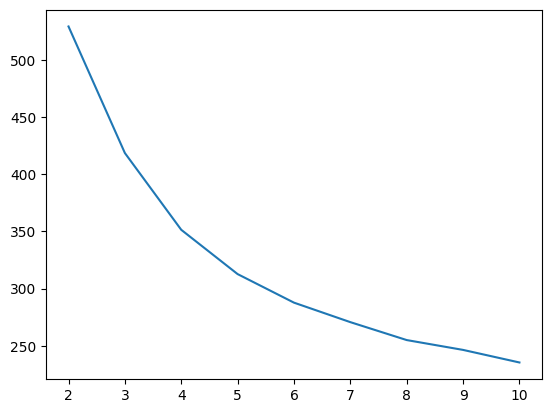

In [8]:
sns.lineplot(x=range(2,11),y=inertia_list)
# 엘보 스코어가 안 보임 

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
score = []
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(df)
    pred=km.predict(df)
    score.append(silhouette_score(df,pred))

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<AxesSubplot: >

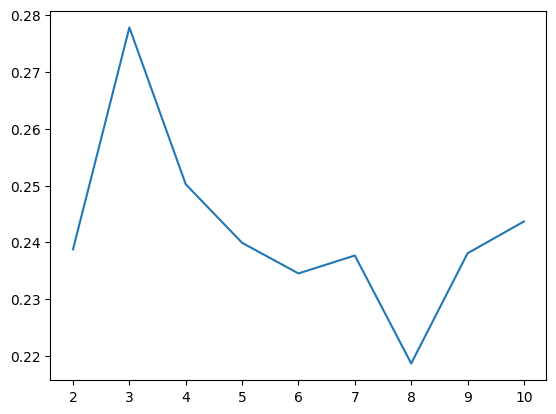

In [11]:
sns.lineplot(x=range(2,11),y=score)

In [12]:
n_clusters = 3

In [13]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
pred = kmeans.predict(df)

In [15]:
pred

array([1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1])

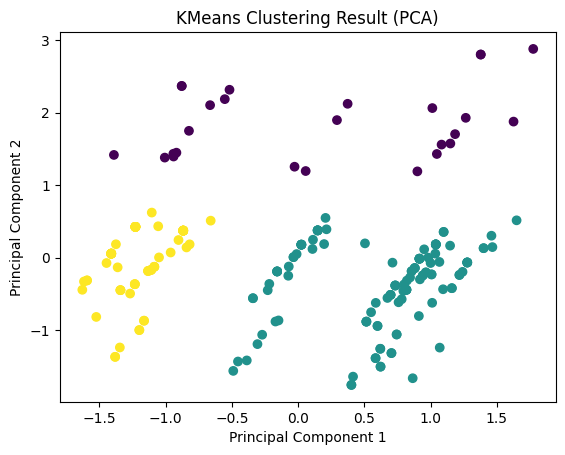

In [16]:
from sklearn.decomposition import PCA

# Assuming df_dum has multiple features
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Result (PCA)')
plt.show()


In [20]:
user_data = np.array([0, 0, 0, 0, 1, 1, 2, 58002, 53003])
plant_pro = np.array([0,0,1,0,1,1,2,58004,53003])
plant_data = np.array(df)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
plant_clusters = kmeans.fit_predict(plant_data)

c:\users\ahneunjeong\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
pca = PCA(n_components=2)
plant_features_pca = pca.fit_transform(plant_data)
user_features = pca.transform(plant_pro.reshape(1, -1))

코사인 유사도

In [23]:
similarity_scores = cosine_similarity(user_features, plant_features_pca)

In [24]:
cluster_indices = np.argsort(similarity_scores, axis=1)[:, ::-1]

In [25]:
top_recommendations = cluster_indices[0][:3]

In [26]:
for recommendation in top_recommendations:
    plant_index = df.iloc[recommendation].name
    plant_values = df.iloc[recommendation].values
    cntntsSj = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == plant_index, 'cntntsSj(식물 명)'].values[0]

    print("Plant Index:", plant_index)
    print("Similarity Score:", similarity_scores[0][recommendation])
    print("Plant Data:", plant_values)
    print("식물명:", cntntsSj)
    print()

Plant Index: 13251
Similarity Score: 0.9999997401028938
Plant Data: [    0     0     0     0     1     1     2 58004 53003]
식물명: 피토니아 핑크스타

Plant Index: 14920
Similarity Score: 0.9995101049296968
Plant Data: [    1     0     0     0     2     1     2 58003 53003]
식물명: 렉스베고니아

Plant Index: 19707
Similarity Score: 0.9995101049296968
Plant Data: [    1     0     0     0     2     1     2 58003 53003]
식물명: 시클라멘



유클리드 유사도

In [27]:
similarity_scores_e = euclidean_distances(user_features, plant_features_pca)

In [28]:
recommendations_indices = np.argsort(similarity_scores_e, axis=1)
top_recommendations_e = recommendations_indices[0][:3]

In [29]:
for recommendation in top_recommendations_e:
    plant_index = df.iloc[recommendation].name
    plant_values = df.iloc[recommendation].values
    cntntsSj = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == plant_index, 'cntntsSj(식물 명)'].values[0]

    print("Plant Index:", plant_index)
    print("Similarity Score:", similarity_scores[0][recommendation])
    print("Plant Data:", plant_values)
    print("식물명:", cntntsSj)
    print()

Plant Index: 13251
Similarity Score: 0.9999997401028938
Plant Data: [    0     0     0     0     1     1     2 58004 53003]
식물명: 피토니아 핑크스타

Plant Index: 13319
Similarity Score: 0.9943470735504684
Plant Data: [    1     0     1     0     1     1     2 58003 53003]
식물명: 칼랑코에

Plant Index: 13004
Similarity Score: 0.9937029275079238
Plant Data: [    1     0     0     0     1     1     2 58003 53003]
식물명: 틸란드시아



그 외

In [51]:
def manhattan_similarity(a, b):
    return np.sum(np.abs(a - b))

def chebyshev_similarity(a, b):
    return np.max(np.abs(a - b))

def hamming_similarity(a, b):
    return np.count_nonzero(a != b)

맨하탄 유사도

In [55]:
manhattan_scores = []
for i in range(len(plant_data)):
    similarity = manhattan_similarity(user_data, plant_data[i])
    manhattan_scores.append(similarity)

In [56]:
manhattan_indices = np.argsort(manhattan_scores)

In [57]:
top_recommendations_manhattan = manhattan_indices[:3]

In [65]:
 for recommendation in top_recommendations_manhattan:
    plant_index = df.iloc[recommendation].name
    plant_values = df.iloc[recommendation].values
    cntntsSj = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == plant_index, 'cntntsSj(식물 명)'].values[0]

    print("Plant Index:", plant_index)
    print("Plant Data:", plant_values)
    print("Similarity Score:", manhattan_scores[recommendation])
    print("식물명:", cntntsSj)
    print()

Plant Index: 18581
Plant Data: [    0     0     0     0     1     1     2 58002 53003]
Similarity Score: 0
식물명: 은사철나무

Plant Index: 16450
Plant Data: [    0     0     0     0     2     1     2 58002 53003]
Similarity Score: 1
식물명: 자주색만년초

Plant Index: 13240
Plant Data: [    0     0     1     0     1     1     2 58002 53003]
Similarity Score: 1
식물명: 페페로미아 오브투시폴리아



In [75]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_scores_2 = manhattan_distances(user_features, plant_features_pca)[0]

In [76]:
manhattan_indices_2 = np.argsort(manhattan_scores_2)

In [77]:
top_recommendations_manhattan_c = manhattan_indices[:3]

In [79]:
threshold = 1e-10

for recommendation in top_recommendations_manhattan_c:
    plant_index = df.iloc[recommendation].name
    plant_values = df.iloc[recommendation].values
    cntntsSj = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == plant_index, 'cntntsSj(식물 명)'].values[0]
    similarity_score = manhattan_scores[recommendation]

    if similarity_score < threshold:
        similarity_score = 0

    print("Plant Index:", plant_index)
    print("Plant Data:", plant_values)
    print("Similarity Score:", similarity_score)
    print("식물명:", cntntsSj)
    print()

Plant Index: 18581
Plant Data: [    0     0     0     0     1     1     2 58002 53003]
Similarity Score: 0
식물명: 은사철나무

Plant Index: 13240
Plant Data: [    0     0     1     0     1     1     2 58002 53003]
Similarity Score: 0.0814044769089386
식물명: 페페로미아 오브투시폴리아

Plant Index: 13216
Plant Data: [    0     0     1     0     1     1     2 58002 53003]
Similarity Score: 0.0814044769089386
식물명: 페페로미아 클루시폴리아



말레하탄 유사도

In [59]:
chebyshev_scores = []
for i in range(len(plant_data)):
    similarity = chebyshev_similarity(user_data, plant_data[i])
    chebyshev_scores.append(similarity)

In [63]:
chebyshev_indices = np.argsort(chebyshev_scores)

In [64]:
top_recommendations_chebyshev = chebyshev_indices[:3]

In [66]:
for recommendation in top_recommendations_chebyshev:
    plant_index = df.iloc[recommendation].name
    plant_values = df.iloc[recommendation].values
    cntntsSj = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == plant_index, 'cntntsSj(식물 명)'].values[0]

    print("Plant Index:", plant_index)
    print("Plant Data:", plant_values)
    print("Similarity Score:", chebyshev_scores[recommendation])
    print("cntntsSj:", cntntsSj)
    print()

Plant Index: 18581
Plant Data: [    0     0     0     0     1     1     2 58002 53003]
Similarity Score: 0
cntntsSj: 은사철나무

Plant Index: 12938
Plant Data: [    1     1     0     0     1     1     2 58001 53003]
Similarity Score: 1
cntntsSj: 가울테리아

Plant Index: 19712
Plant Data: [    1     0     0     0     2     2     2 58003 53003]
Similarity Score: 1
cntntsSj: 심비디움



해밍 유사도

In [67]:
hamming_scores = []
for i in range(len(plant_data)):
    similarity = hamming_similarity(user_data, plant_data[i])
    hamming_scores.append(similarity)

In [68]:
hamming_indices = np.argsort(hamming_scores)

In [69]:
top_recommendations_hamming = hamming_indices[:3]

In [70]:
for recommendation in top_recommendations_hamming:
    plant_index = df.iloc[recommendation].name
    plant_values = df.iloc[recommendation].values
    cntntsSj = df_o.loc[df_o['cntntsNo(컨텐츠 번호)'] == plant_index, 'cntntsSj(식물 명)'].values[0]

    print("Plant Index:", plant_index)
    print("Plant Data:", plant_values)
    print("Similarity Score:", hamming_scores[recommendation])
    print("cntntsSj:", cntntsSj)
    print()

Plant Index: 18581
Plant Data: [    0     0     0     0     1     1     2 58002 53003]
Similarity Score: 0
cntntsSj: 은사철나무

Plant Index: 13240
Plant Data: [    0     0     1     0     1     1     2 58002 53003]
Similarity Score: 1
cntntsSj: 페페로미아 오브투시폴리아

Plant Index: 13197
Plant Data: [    0     0     0     0     1     1     2 58003 53003]
Similarity Score: 1
cntntsSj: 피토니아 화이트스타

